In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time

In [2]:
data = pd.read_csv(r"C:\Users\lcatteau\Desktop\datap7", index_col='SK_ID_CURR').drop(columns='Unnamed: 0')

In [3]:
data.head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_INCOME_TYPE_enc,NAME_EDUCATION_TYPE_enc,NAME_FAMILY_STATUS_enc,NAME_HOUSING_TYPE_enc,OCCUPATION_TYPE_enc,WEEKDAY_APPR_PROCESS_START_enc,ORGANIZATION_TYPE_enc,FONDKAPREMONT_MODE_enc,HOUSETYPE_MODE_enc,WALLSMATERIAL_MODE_enc
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0.0,0.615,-0.198521,-0.011205,-0.002626,0.865181,0.233104,0.156504,0.439705,...,7,4,3,1,8,6,5,2,0,5
100003,0,0.0,1.365,1.448012,0.597361,-0.820550,-0.139634,0.010117,0.606637,1.148895,...,4,1,1,1,3,1,39,2,0,0
100004,0,0.0,-0.885,-0.702740,-1.004482,-0.472638,-0.453432,0.399838,0.044611,0.280341,...,7,4,3,1,8,1,11,2,0,4
100006,0,0.0,-0.135,-0.372874,0.264691,-0.580533,-0.447792,-0.738972,-0.974312,0.316789,...,7,4,0,1,8,6,5,2,0,4
100007,0,0.0,-0.285,-0.000986,-0.168078,0.525969,-0.575320,-0.738567,0.035287,-0.079100,...,7,4,3,1,3,4,37,2,0,4


In [4]:
data

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_INCOME_TYPE_enc,NAME_EDUCATION_TYPE_enc,NAME_FAMILY_STATUS_enc,NAME_HOUSING_TYPE_enc,OCCUPATION_TYPE_enc,WEEKDAY_APPR_PROCESS_START_enc,ORGANIZATION_TYPE_enc,FONDKAPREMONT_MODE_enc,HOUSETYPE_MODE_enc,WALLSMATERIAL_MODE_enc
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0.0,0.615,-0.198521,-0.011205,-0.002626,0.865181,0.233104,0.156504,0.439705,...,7,4,3,1,8,6,5,2,0,5
100003,0,0.0,1.365,1.448012,0.597361,-0.820550,-0.139634,0.010117,0.606637,1.148895,...,4,1,1,1,3,1,39,2,0,0
100004,0,0.0,-0.885,-0.702740,-1.004482,-0.472638,-0.453432,0.399838,0.044611,0.280341,...,7,4,3,1,8,1,11,2,0,4
100006,0,0.0,-0.135,-0.372874,0.264691,-0.580533,-0.447792,-0.738972,-0.974312,0.316789,...,7,4,0,1,8,6,5,2,0,4
100007,0,0.0,-0.285,-0.000986,-0.168078,0.525969,-0.575320,-0.738567,0.035287,-0.079100,...,7,4,3,1,3,4,37,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,0.0,0.115,-0.480518,0.146912,0.734898,0.883615,0.395386,-0.722552,0.493214,...,7,4,2,5,14,4,43,2,0,5
456252,0,0.0,-0.835,-0.452949,-0.713894,0.338425,-0.691292,148.302711,0.021209,-0.324157,...,3,4,5,1,8,1,57,2,0,5
456253,0,0.0,0.065,0.304712,0.280876,-0.742242,0.107855,-2.714690,-0.408264,-0.735169,...,7,1,2,1,10,4,39,2,0,4


In [5]:
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col] = data[col].astype('float32')
for col in data.columns:
    if data[col].dtype == 'int64':
        data[col] = data[col].astype('int32')

In [6]:
y = data['TARGET']
X = data.drop(columns='TARGET')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

# Dummy Classifier

In [8]:
%%capture masquer_erreurs
start = time.time()
# Définir le modèle 
dummy = DummyClassifier(strategy="most_frequent")

# Adapter le modèle aux données d'entraînement
dummy.fit(X_train, y_train)

# Évaluer la performance du modèle sur l'ensemble de test
accuracy = dummy.score(X_test, y_test)
print("Précision sur l'ensemble de test:", accuracy)
y_predict = dummy.predict(X_test)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))
temps = time.time() - start
print(temps)

In [9]:
print("Précision sur l'ensemble de test:", accuracy)

Précision sur l'ensemble de test: 0.907


In [10]:
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))

Précision sur l'AUC: 0.5


<AxesSubplot:>

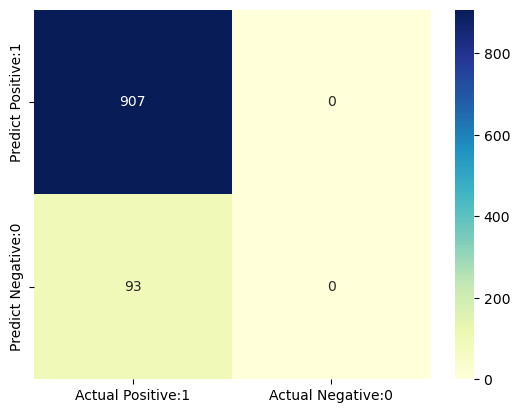

In [11]:
cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Logistic 

In [12]:
%%capture masquer_erreurs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
start = time.time()

# Définir le modèle de régression logistique
logistic_regression = LogisticRegression()

# Définir la grille des hyperparamètres à rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='roc_auc', verbose =5)

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
# Évaluer la performance du modèle sur l'ensemble de test
accuracy = grid_search.score(X_test, y_test)
print("Précision sur l'ensemble de test:", accuracy)
y_predict = grid_search.predict(X_test)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))
temps = time.time() - start
print(temps)

In [13]:
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
print("Précision sur l'ensemble de test:", accuracy)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))

Meilleurs paramètres: {'C': 0.1, 'penalty': 'l2'}
Meilleur accuracy: 0.7150918513969209
Précision sur l'ensemble de test: 0.7114438477315029
Précision sur l'AUC: 0.5


In [14]:
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

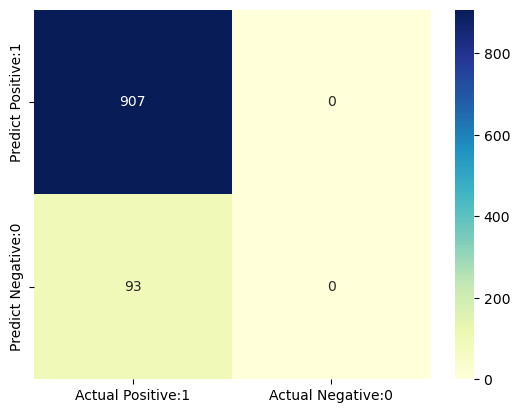

In [15]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Random Forest

In [16]:
%%capture masquer_erreurs
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
start = time.time()
# Définir le modèle RandomForestClassifier
random_forest = RandomForestClassifier(class_weight='balanced')

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='roc_auc', verbose=5)

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
# Évaluer la performance du modèle sur l'ensemble de test
accuracy = grid_search.score(X_test, y_test)
print("Précision sur l'ensemble de test:", accuracy)
temps = time.time() - start
print(temps)

In [17]:
accuracy

0.7226588896397198

In [18]:
grid_search.best_score_

0.7439501201313761

In [19]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [20]:
y_predict = grid_search.predict(X_test)

In [21]:

roc_auc_score(y_test, y_predict)

0.5230228450166565

# Lightgbm

pip install lightgbm

In [22]:
import lightgbm as lgb

In [23]:
# Définir le modèle 
lightgbm = lgb.LGBMClassifier(class_weight='balanced')
start = time.time()
# Définir la grille des hyperparamètres à rechercher
param_grid = {'boosting_type' : ['gbdt'], 
              'num_leaves' : [5, 10, 31,4, 5],
              'max_depth' : [-1, 0, 10, 20], 
              'learning_rate' : [0.1, 0.5, 0.7]
              #n_estimators=100
             }


# Créer l'objet GridSearchCV
grid_search = GridSearchCV(lightgbm, param_grid, cv=5, scoring='roc_auc')

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
accuracy = grid_search.score(X_test, y_test)
y_predict = grid_search.predict(X_test)
temps = time.time() - start
print(temps)

[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you d

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3942
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you d

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you d

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3942
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3942
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3942
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3942
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3942
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3951
[LightGBM] [Info] Number of data points in the train set: 245208, number of used features: 57
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 19785, number of negative: 225424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3948
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19785, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047905 seconds.
You ca

[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3947
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19786, number of negative: 225423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3942
[LightGBM] [Info] Number of data points in the train set: 245209, number of used features: 57
[LightGBM] [Info

In [24]:
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))
print("Précision sur l'ensemble de test:", accuracy)

Meilleurs paramètres: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 10, 'num_leaves': 31}
Meilleur accuracy: 0.7535442351292669
Précision sur l'AUC: 0.6806321205439176
Précision sur l'ensemble de test: 0.7431210062714135


<AxesSubplot:>

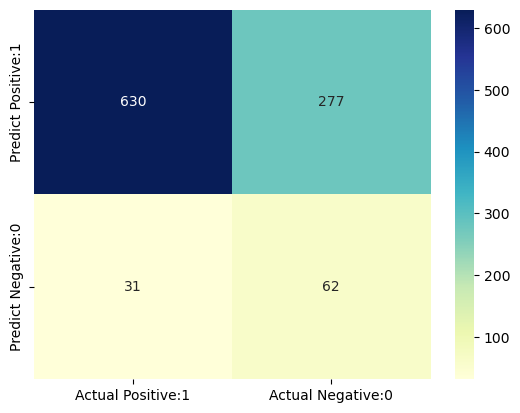

In [25]:
cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
#Pour mettre en place un predict proba avec un seuil de 0.6 

In [27]:
df_pred = pd.DataFrame(grid_search.predict_proba(X_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [28]:
def prediction(row):
    if row[1]>=0.75 :
         return 1
    else :
        return 0

df_pred['pred_reel'] = df_pred.apply(lambda row : prediction(row),axis=1)

<AxesSubplot:>

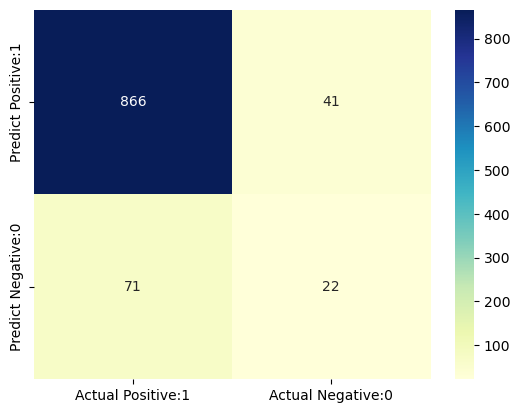

In [29]:
cm = confusion_matrix(y_test, df_pred['pred_reel'])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [30]:
# Définir le modèle 
svm = SVC(class_weight='balanced')

# Définir la grille des hyperparamètres à rechercher
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
             }


# Créer l'objet GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc')

# Adapter le modèle aux données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
accuracy = grid_search.score(X_test, y_test)
y_predict = grid_search.predict(X_test)
temps = time.time() - start
print(temps)

KeyboardInterrupt: 

In [ ]:
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur accuracy:", grid_search.best_score_)
print("Précision sur l'AUC:",roc_auc_score(y_test, y_predict))
print("Précision sur l'ensemble de test:", accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')